### import modules

In [7]:
import numpy as np
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# ticker_kor

In [2]:
# get kor tickers
    
def return_name(market):
    '''get name from ticker'''
    Market = []
    for ticker in market:
        Value =stock.get_market_ticker_name(ticker)
        Market.append([Value,ticker])
 
    df = pd.DataFrame(Market,columns=['회사명','상장번호'])
    return df

KOSPI = stock.get_market_ticker_list(market="KOSPI")
KOSDAQ = stock.get_market_ticker_list(market="KOSDAQ")

kospi = return_name(KOSPI)
kosdaq = return_name(KOSDAQ)

# 시가총액 4대 기업 포트폴리오

In [3]:
# 시가총액 4대 기업 주식정보가져오기

tmp_ditc = {}
df_res = pd.DataFrame()

for idx, stocks in enumerate([['삼성전자','LG에너지솔루션'],
              ['삼성전자','LG에너지솔루션','SK하이닉스'],
              ['삼성전자','LG에너지솔루션','SK하이닉스','삼성바이오로직스']]):
    for i in stocks:
        ticker = kospi[kospi['회사명'] == i].values[0][1]
        df_res[i] = stock.get_market_ohlcv_by_date("20190101", "20230225", ticker)['종가']


    # Efficient Invest line

    # get return and risk
    daily_ret = df_res.pct_change()           # pct_change() : get daily rate of return
    annual_ret = daily_ret.mean() * 252       # yearly rate of return = daily mean * 252(business day)

    daily_cov = daily_ret.cov()               # daily risk
    annual_cov = daily_cov * 252              # yearly risk = daily risk * 252(business day)

    # get random portfolio weight
    weights = np.random.random(len(stocks)) # weights of stocks
    weights /= np.sum(weights)        # sum of weights = 1

    port_ret = []       # portfolio return
    port_risk = []      # portfolio risk
    port_weights = []   # weights
    sharpe_ratio = []   # sharpe ratio = return/risk

    for _ in range(10000):                         # generate 20000 cases

        weights = np.random.random(len(stocks))    # get weights 
        weights /= np.sum(weights)                 

        returns = np.dot(weights, annual_ret)      # portfolio return = weights * returns
        risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))    # portfolio risk = weights * risks

        # append values to lists
        port_ret.append(returns)                    
        port_risk.append(risk) 
        port_weights.append(weights) 
        sharpe_ratio.append(returns/risk)           


    # get dict of Retunrs, Risk, Sharpe, Weights
    portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe' : sharpe_ratio}
    for i, s in enumerate(stocks): 
        portfolio[s] = [weight[i] for weight in port_weights] 

    # from dict to dataframe
    df = pd.DataFrame(portfolio) 
    df = df[['Returns', 'Risk','Sharpe'] + [s for s in stocks]] 
    tmp_ditc[idx] = df

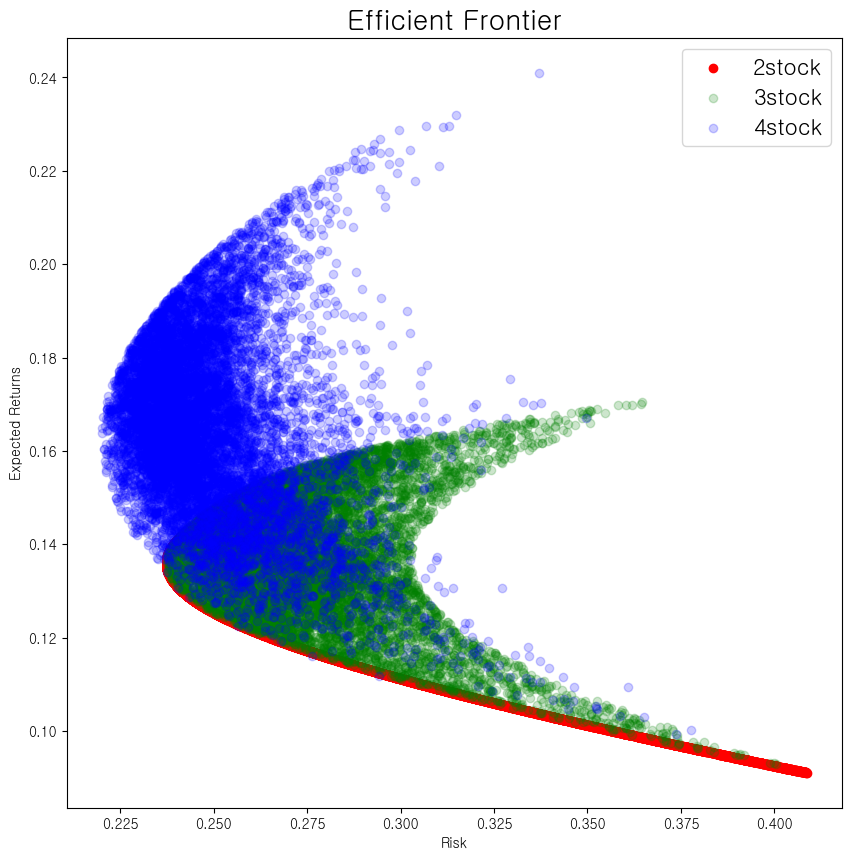

In [8]:
plt.figure(figsize=(10,10))
plt.title('Efficient Frontier', fontsize= 20) 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.scatter(tmp_ditc[0]['Risk'], tmp_ditc[0]['Returns'], color = 'r', alpha = 1, label = '2stock')
plt.scatter(tmp_ditc[1]['Risk'], tmp_ditc[1]['Returns'], color = 'g', alpha = 0.2, label = '3stock')
plt.scatter(tmp_ditc[2]['Risk'], tmp_ditc[2]['Returns'], color = 'b', alpha = 0.2, label = '4stock')
plt.legend(fontsize = 16)
plt.show();

In [9]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\infomax\\anaconda3\\envs\\infomax\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

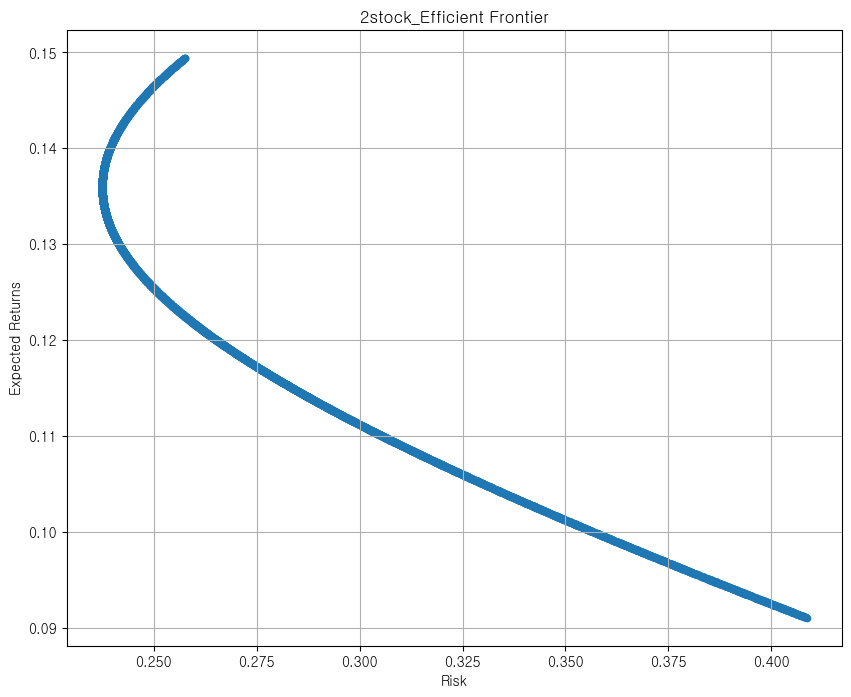

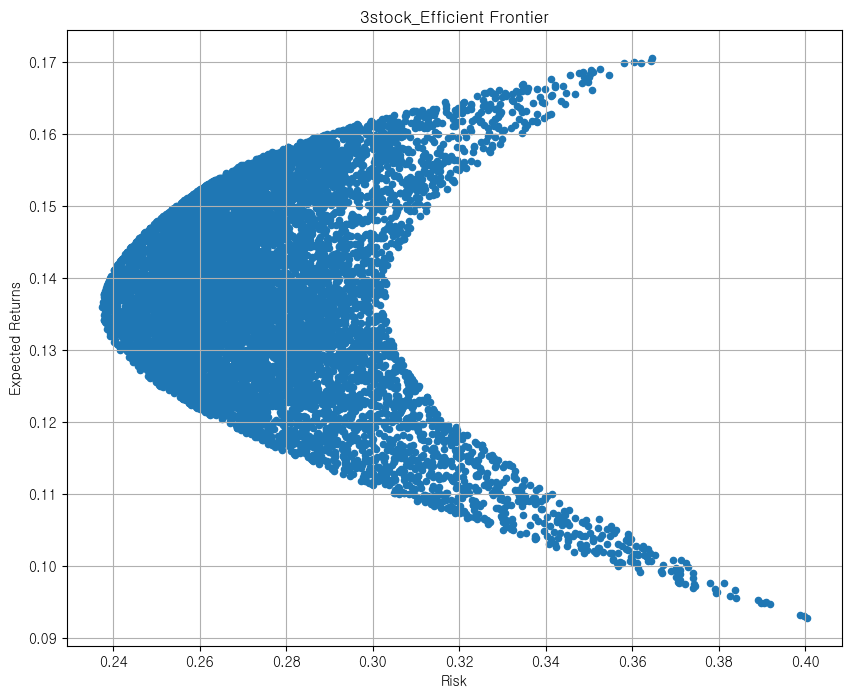

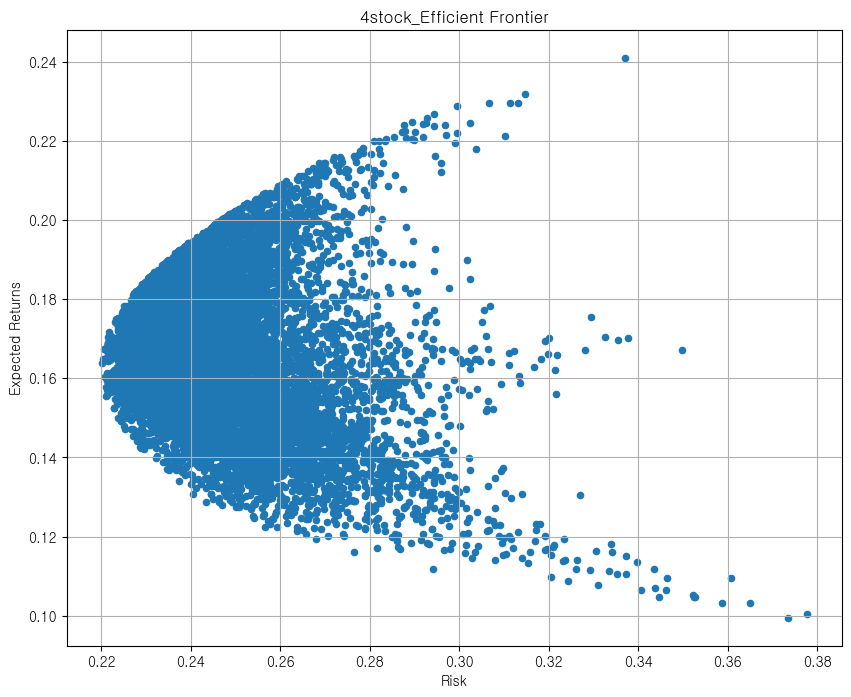

In [10]:
for i in [0,1,2]:
    tmp_ditc[i].plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True)
    plt.title(f'{i+2}stock_Efficient Frontier') 
    plt.xlabel('Risk') 
    plt.ylabel('Expected Returns') 